In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")
#data

In [ ]:
data = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRData.csv")

In [3]:
date1 = '01/22/2020'
date2 = '04/21/2020'
mydates = pd.date_range(date1, date2).tolist()
mydates

[Timestamp('2020-01-22 00:00:00', freq='D'),
 Timestamp('2020-01-23 00:00:00', freq='D'),
 Timestamp('2020-01-24 00:00:00', freq='D'),
 Timestamp('2020-01-25 00:00:00', freq='D'),
 Timestamp('2020-01-26 00:00:00', freq='D'),
 Timestamp('2020-01-27 00:00:00', freq='D'),
 Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp('2020-02-06 00:00:00', freq='D'),
 Timestamp('2020-02-07 00:00:00', freq='D'),
 Timestamp('2020-02-08 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-02-10 00:00:00', freq='D'),
 Timestamp('2020-02-11 00:00:00', freq='D'),
 Timestamp('2020-02-12 00:00:00', freq='D'),
 Timestamp

In [4]:
dates = pd.DataFrame(mydates)
dates = dates.rename(columns = {0:"Date1"})
#dates = dates.set_index("Date")

dates['Date'] = dates['Date1'].dt.strftime('%m/%d/%Y')
dates = dates.set_index("Date")
dates

,Date1
Date,
01/22/2020,2020-01-22
01/23/2020,2020-01-23
01/24/2020,2020-01-24
01/25/2020,2020-01-25
01/26/2020,2020-01-26
01/27/2020,2020-01-27
01/28/2020,2020-01-28
01/29/2020,2020-01-29
01/30/2020,2020-01-30


In [5]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

df = pd.DataFrame()

for x in range(len(states)):
    dataU = data[data["Province/State"] == states[x]]  
    groupDate = dataU.groupby("Last Update")
    df1 = groupDate.count()

    df1 = list(df1.index.values)
    #df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))

    dfDate = pd.DataFrame(df1)
    
    dataC = data[data["Province/State"] == states[x]]
    groupC = dataC.groupby("Last Update")
    dC = groupC.sum()
    dC = list(dC["Confirmed"].values)
    
    dC.sort()
    
    dfC = pd.DataFrame({states[x]: dC})
    dfC = pd.concat([dfDate,dfC], axis=1, sort = False)
    dfC = dfC.rename(columns={0: "Date"})
    dfC = dfC.set_index('Date')
    
    df = pd.concat([df,dfC], axis=1, sort = False)
    
df

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,DC
03/14/2020,6.0,NaN,12.0,12.0,340.0,101.0,22.0,6.0,76.0,66.0,...,32.0,57.0,10.0,5.0,41.0,572.0,NaN,27.0,2.0,NaN
03/15/2020,12.0,NaN,NaN,16.0,426.0,NaN,24.0,NaN,115.0,99.0,...,NaN,72.0,28.0,NaN,45.0,643.0,NaN,32.0,3.0,16.0
03/16/2020,29.0,NaN,18.0,22.0,557.0,160.0,30.0,8.0,155.0,121.0,...,52.0,85.0,39.0,12.0,49.0,904.0,NaN,47.0,NaN,22.0
03/17/2020,39.0,3.0,20.0,NaN,698.0,160.0,68.0,16.0,216.0,146.0,...,74.0,110.0,51.0,NaN,67.0,1014.0,1.0,72.0,11.0,NaN
03/18/2020,46.0,6.0,27.0,33.0,751.0,184.0,NaN,19.0,314.0,199.0,...,79.0,173.0,NaN,18.0,77.0,1076.0,NaN,92.0,15.0,31.0
03/19/2020,78.0,9.0,45.0,62.0,952.0,277.0,159.0,30.0,417.0,287.0,...,154.0,260.0,78.0,22.0,99.0,1376.0,2.0,159.0,18.0,40.0
03/20/2020,83.0,12.0,78.0,96.0,1177.0,363.0,194.0,38.0,563.0,420.0,...,233.0,394.0,80.0,29.0,122.0,1524.0,7.0,207.0,19.0,71.0
03/21/2020,131.0,15.0,118.0,122.0,1364.0,390.0,194.0,45.0,659.0,507.0,...,371.0,581.0,136.0,NaN,156.0,1793.0,8.0,282.0,23.0,98.0
03/22/2020,157.0,20.0,152.0,165.0,1646.0,591.0,327.0,56.0,1004.0,621.0,...,505.0,643.0,162.0,52.0,220.0,1997.0,16.0,381.0,26.0,120.0
03/23/2020,196.0,30.0,235.0,192.0,2108.0,704.0,415.0,68.0,1227.0,772.0,...,614.0,758.0,257.0,75.0,254.0,2221.0,16.0,425.0,26.0,141.0


In [6]:
df = pd.concat([dates, df], axis=1, sort=False)

In [7]:
#df 

In [8]:
df[["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
    "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", 
    "ND", "OH","OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", 
    "WI", "WY", "DC"]] = df[["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN",
                             "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", 
                             "NH", "NJ", "NM", "NY", "NC", "ND", "OH","OK", "OR", "PA", "RI", "SC", "SD", "TN", 
                             "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]].interpolate()
df=df.fillna(0)
df

,Date1,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,DC
01/22/2020,2020-01-22,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/23/2020,2020-01-23,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/24/2020,2020-01-24,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/25/2020,2020-01-25,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/26/2020,2020-01-26,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/27/2020,2020-01-27,0.0,0.0,1.0,0.0,1.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/28/2020,2020-01-28,0.0,0.0,1.0,0.0,2.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/29/2020,2020-01-29,0.0,0.0,1.0,0.0,2.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/30/2020,2020-01-30,0.0,0.0,1.0,0.0,2.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
01/31/2020,2020-01-31,0.0,0.0,1.0,0.0,2.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(-70, -2550, 'Dates')

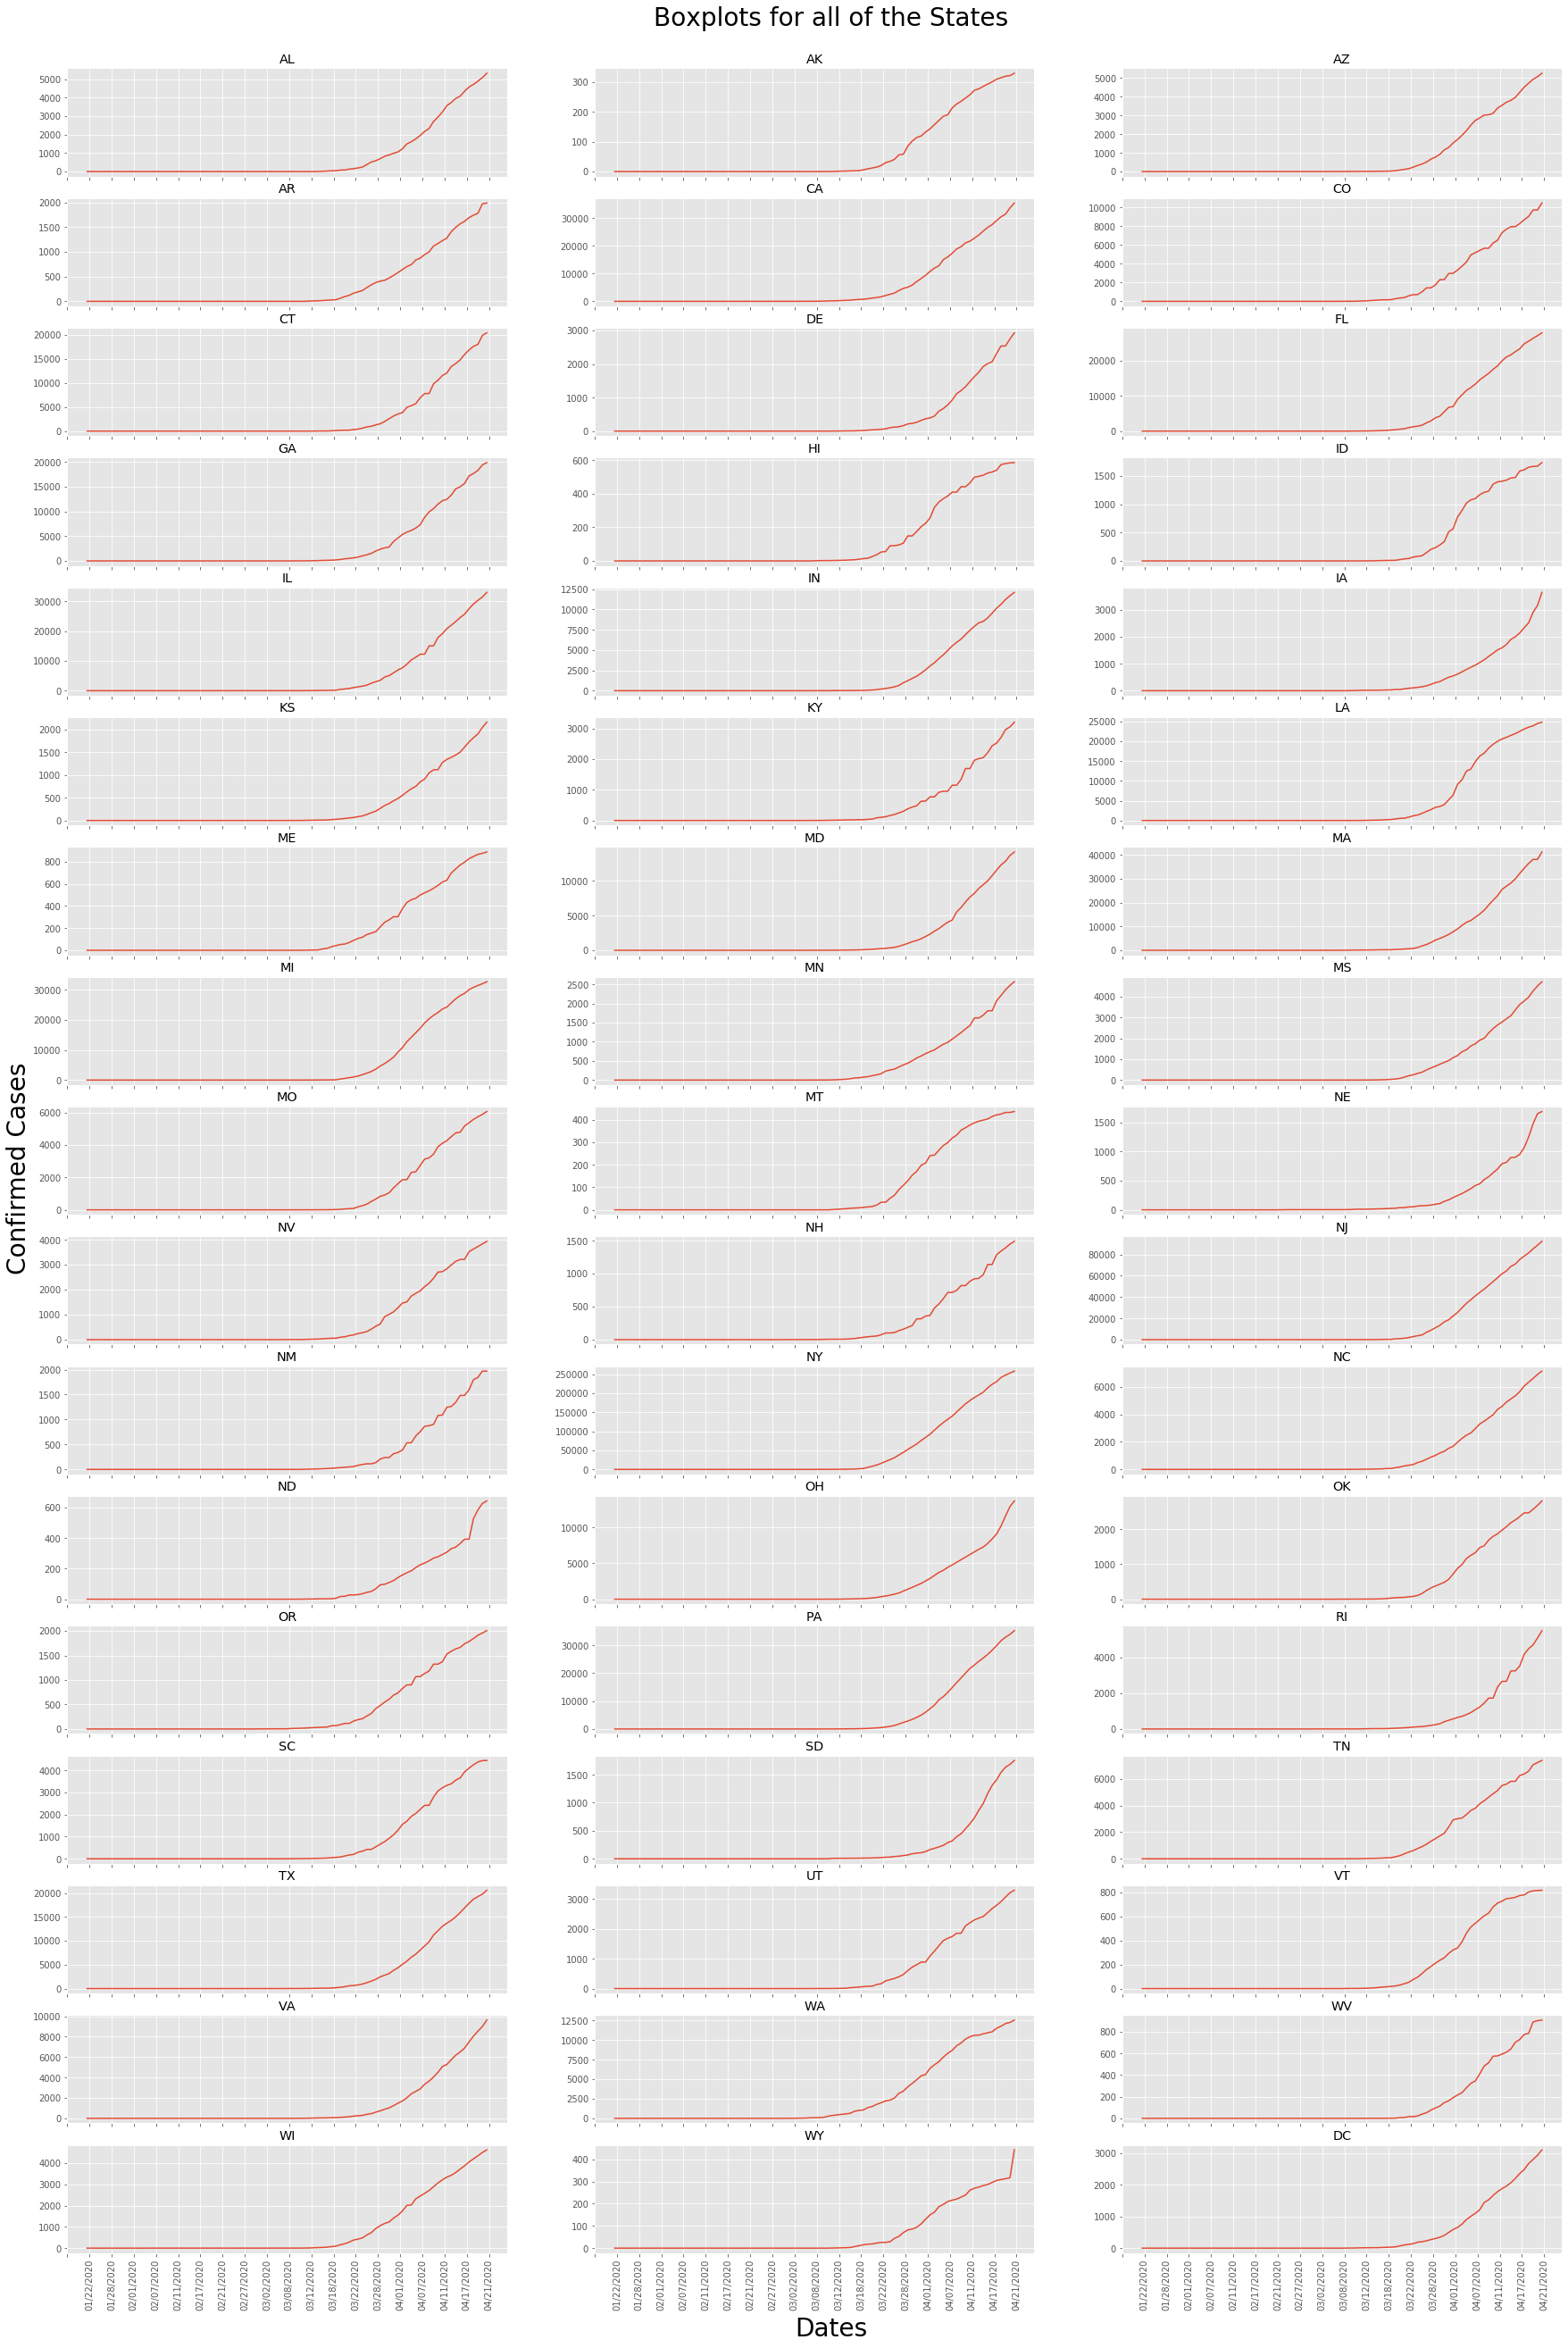

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 45)

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

fig, axs = plt.subplots(17, 3, sharex = 'col')
for i in range(17):
    axs[i,0].plot(pd.DataFrame(df[states[3*i]]))
    axs[i,0].set_title(states[3*i])
    axs[i,1].plot(pd.DataFrame(df[states[3*i+1]]))
    axs[i,1].set_title(states[3*i+1]) 
    axs[i,2].plot(pd.DataFrame(df[states[3*i+2]]))
    axs[i,2].set_title(states[3*i+2])
    
for ax in axs.flat:
    #ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
       
#for ax in axs.flat:
#    ax.label_outer()
    
stepsize = 5
for ax in axs.flat:
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    
fig.text(0.1, 0.5, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=28)


plt.text(-70, 70250, 'Boxplots for all of the States', ha='center', va='center', rotation='horizontal', fontsize=28)
plt.text(-70, -2550, 'Dates', ha='center', va='center', rotation='horizontal', fontsize=28)

Text(45, -27000, 'Dates')

<Figure size 360x360 with 0 Axes>

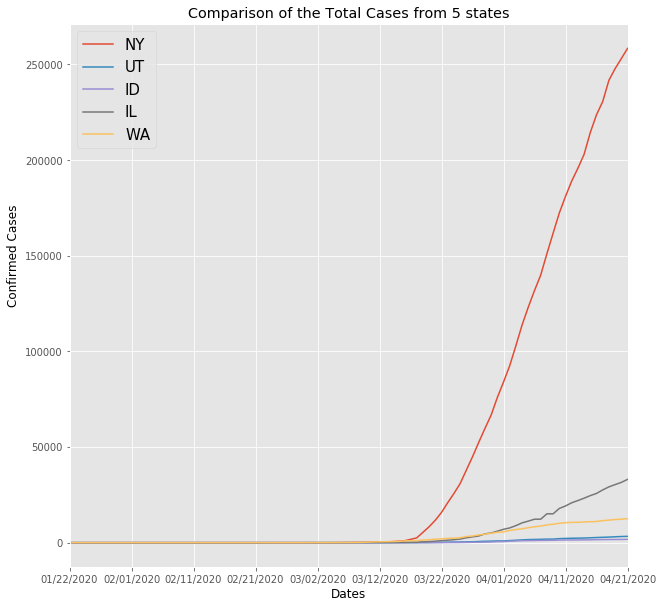

In [28]:
plt.figure(figsize=(5, 5))
state = ['NY', 'UT', 'ID', 'IL', 'WA']

dfdata = pd.DataFrame()

for x in range(len(state)):
    df1 = pd.DataFrame(df[state[x]])
    dfdata = pd.concat([dfdata, df1], axis = 1, sort = False)

dfdata    
dfdata.plot(grid = True, figsize = (10,10),title="Comparison of the Total Cases from 5 states");
plt.legend(loc=2, prop={'size': 15})

plt.text(-9, 150000, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=12)
plt.text(45, -27000, 'Dates', ha='center', va='center', rotation='horizontal', fontsize=12)